## Aim of this class is to get familiar with scaling relations in elliptical galaxies

do **NOT** copy the catalogues (they'll eat up your quota), use them directly via:

In [12]:
szuflada_path = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/'
merged_file = szuflada_path + 'merged_cats.csv'

some imports for the class:

In [13]:
import pandas as pd
pd.options.mode.copy_on_write = True

from astropy.io import fits
from astropy.table import Table

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import numpy as np

In [16]:
import astropy.units as u

In [17]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=.3)

### TASK 1: explore the Faber-Jackson law / fundamental plane based on GAMA galaxies

#### Try to replicate right panel of attached figure (fundamental plane, mag vs Re)

![image](05b_1.png)

Some questions/hints to answer first:
- does GAMA provide luminosity measurements? if not, what can be used as a proxy?
- effective radii are available in SersicPhotometry, though not in kpc ;)

In [18]:
df = pd.read_csv(merged_file)

df

,Unnamed: 0,magphys_CATAID,magphys_Z,magphys_f_mu_SFH_best_fit,magphys_f_mu_SFH_percentile2_5,magphys_f_mu_SFH_percentile16,magphys_f_mu_SFH_percentile50,magphys_f_mu_SFH_percentile84,magphys_f_mu_SFH_percentile97_5,magphys_f_mu_IR_best_fit,...,lambdar_P100_flux,lambdar_P100_fluxerr,lambdar_P160_flux,lambdar_P160_fluxerr,lambdar_S250_flux,lambdar_S250_fluxerr,lambdar_S350_flux,lambdar_S350_fluxerr,lambdar_S500_flux,lambdar_S500_fluxerr
0,0,6802,0.0505,0.207,0.207,0.367,0.449,0.485,0.878,0.088,...,0.032651,0.015960,0.073685,0.017658,0.001642,0.004669,4.159698e-03,0.006343,0.001534,0.007367
1,1,6803,0.1603,0.896,0.743,0.856,0.917,0.967,0.993,0.793,...,0.021891,0.016205,0.000000,0.031150,0.000000,0.011762,0.000000e+00,0.009090,0.000000,0.014676
2,2,6804,0.2188,0.294,0.114,0.189,0.254,0.337,0.390,0.174,...,0.026714,0.018274,0.036956,0.018404,0.000427,0.007681,1.039151e-06,0.010507,0.000000,0.008198
3,3,6805,0.3324,0.813,0.376,0.616,0.789,0.891,0.984,0.700,...,0.000000,0.017301,0.000000,0.020030,0.000002,0.015003,4.553747e-07,0.011320,0.000699,0.007212
4,4,6806,0.3312,0.491,0.471,0.489,0.521,0.540,0.563,0.636,...,0.061030,0.013629,0.082787,0.020847,0.049077,0.005181,2.506699e-02,0.007439,0.003129,0.005346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197489,197489,4342359,0.6461,0.386,0.257,0.315,0.390,0.447,0.832,0.394,...,0.008374,0.012467,0.004024,0.018801,0.039752,0.006549,1.655424e-02,0.006414,0.001624,0.007022
197490,197490,4345057,0.7930,0.549,0.486,0.539,0.570,0.605,0.658,0.444,...,0.023930,0.017078,0.000000,0.018468,0.035357,0.005343,2.843765e-02,0.005160,0.008383,0.007839
197491,197491,4345978,0.6111,0.938,0.473,0.499,0.533,0.578,0.935,0.806,...,0.012371,0.012664,0.081687,0.014242,0.049973,0.007160,4.104709e-02,0.009095,0.027539,0.010080
197492,197492,4347483,0.5960,0.612,0.535,0.560,0.598,0.633,0.675,0.468,...,0.000000,0.027229,0.083970,0.016024,0.027227,0.003637,1.820215e-02,0.008872,0.020907,0.011142


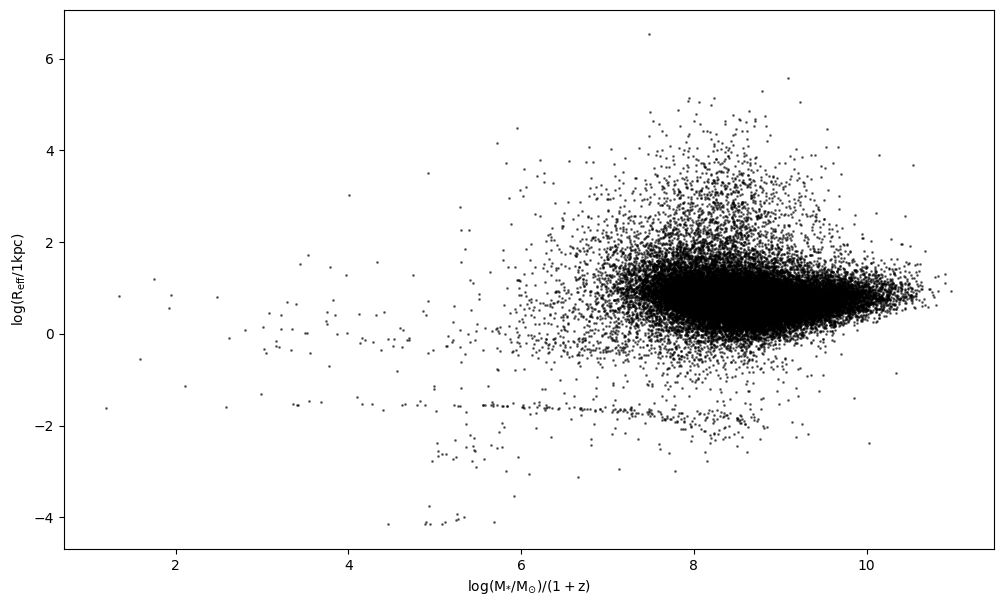

In [21]:
Z = df['magphys_Z'].values
d_A = cosmo.angular_diameter_distance(Z)
theta_rad = (df['sersic_GALRE_r'].values * u.arcsec).to(u.rad).value
df['reff_kpc'] = d_A.to(u.kpc).value * theta_rad

early = df[df['sersic_GALINDEX_r'] > 4.0]

fig, ax = plt.subplots(figsize=(12, 7))

ax.scatter(early['magphys_mass_stellar_percentile50']/(early['magphys_Z'] + 1), np.log10(early['reff_kpc']), color='k', s=1, alpha=0.5)
ax.set_xlabel(r'$\rm \log(M_{*}/M_{\odot}) / (1 + z)$')
ax.set_ylabel(r'$\rm \log(R_{eff}/1 kpc)$')
# ax.set_yscale('log')

plt.show()

#### Try to replicate the attached figure (Faber-Jackson law, both panels)

![image](05b_2.png)

Some questions/hints to answer first:
- velocity dispersion is available in ``VelocityDispersionsv02.fits`` in SZUFLADA

In [ ]:
from astropy.table import Table

vel_file = '/home/SZUFLADA/PN/extragalactic_classes/gama_dr4/VelocityDispersionsv02.fits'
vel_table = Table.read(vel_file)
vel_df = vel_table.to_pandas()

vel_df

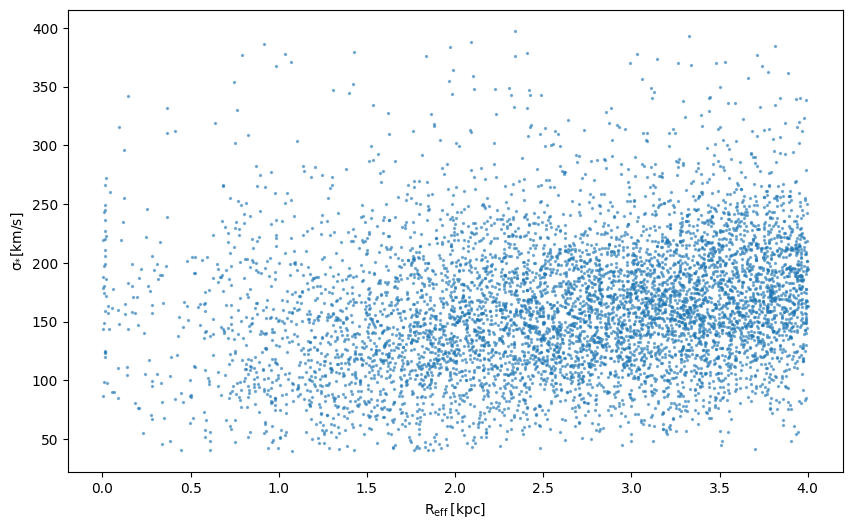

In [18]:
merged = df.merge(vel_df, left_on='magphys_CATAID', right_on='CATAID')

early = merged['sersic_GALINDEX_r'] > 4
mask = (merged['rad_kpc'] <= 4) & (merged['SIG_STARCORR'] <= 400) & (merged['SIG_STARCORR']  > 40)

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    merged.loc[early & mask, 'rad_kpc'],
    merged.loc[early & mask, 'SIG_STARCORR'],
    s=2,
    alpha=0.5
)

ax.set_xlabel(r'$\rm R_{eff} \: [kpc]$')
ax.set_ylabel(r'$\rm \sigma_{*} [km/s]$')

plt.show()

In [ ]:
# merged = df.merge(vel_df, left_on='magphys_CATAID', right_on='CATAID')

# early = merged['sersic_GALINDEX_r'] > 4
# mask = (merged['rad_kpc'] <= 4) & (merged['SIG_STARCORR'] <= 400) & (merged['SIG_STARCORR']  > 40)

# fig, ax = plt.subplots(figsize=(10, 6))
# ax.scatter(
#     merged.loc[early & mask, 'rad_kpc'],
#     merged.loc[early & mask, 'SIG_STARCORR'],
#     s=2,
#     alpha=0.5
# )

# ax.set_xlabel(r'$\rm R_{eff} \: [kpc]$')
# ax.set_ylabel(r'$\rm \sigma_{*} [km/s]$')

# plt.show()